In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-02-19 16:38:42.934150


In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-02-19 16:38:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  18.1MB/s    in 6.9s    

2024-02-19 16:38:50 (15.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/pizza/

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [5]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .


In [6]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_pizza_images_test = len(os.listdir("pizza_steak/train/pizza"))
num_steak_images_train , num_pizza_images_test

(750, 750)

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder +"/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape : {img.shape}")

  return img

Image Shape : (512, 512, 3)


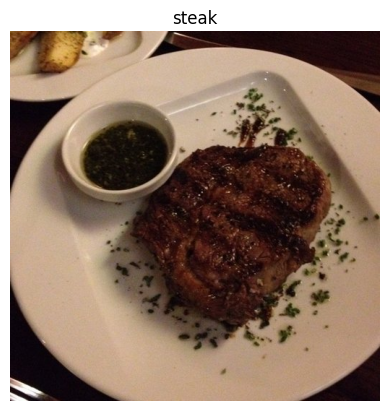

In [9]:
img = view_random_image(target_dir = "pizza_steak/train/",target_class = "steak")

In [10]:
img.shape

(512, 512, 3)

array([[[147, 105,  47],
        [143, 101,  43],
        [139,  96,  41],
        ...,
        [ 28,   8,  10],
        [ 28,   6,   9],
        [ 29,   7,  10]],

       [[137,  95,  37],
        [129,  87,  29],
        [125,  82,  27],
        ...,
        [ 27,   7,   9],
        [ 29,   7,  10],
        [ 33,  11,  14]],

       [[114,  69,  14],
        [114,  69,  14],
        [117,  71,  19],
        ...,
        [ 27,   5,   8],
        [ 30,   8,  11],
        [ 35,  13,  16]],

       ...,

       [[166, 147, 149],
        [178, 159, 161],
        [197, 181, 182],
        ...,
        [ 21,   9,  11],
        [ 21,   9,   9],
        [ 21,   9,   9]],

       [[119,  98, 103],
        [139, 120, 124],
        [162, 146, 149],
        ...,
        [ 21,   9,  11],
        [ 21,   9,   9],
        [ 19,   9,   8]],

       [[ 37,  16,  21],
        [ 78,  59,  63],
        [127, 108, 112],
        ...,
        [ 21,   9,  11],
        [ 20,  10,   9],
        [ 19,   9,   8]]], dtype=uint8)
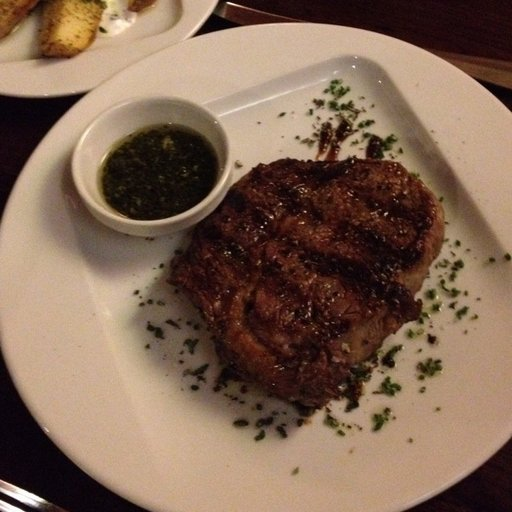

In [11]:
img

In [12]:
img.max() , img.min()

(255, 0)

In [13]:
img/255

array([[[0.57647059, 0.41176471, 0.18431373],
        [0.56078431, 0.39607843, 0.16862745],
        [0.54509804, 0.37647059, 0.16078431],
        ...,
        [0.10980392, 0.03137255, 0.03921569],
        [0.10980392, 0.02352941, 0.03529412],
        [0.11372549, 0.02745098, 0.03921569]],

       [[0.5372549 , 0.37254902, 0.14509804],
        [0.50588235, 0.34117647, 0.11372549],
        [0.49019608, 0.32156863, 0.10588235],
        ...,
        [0.10588235, 0.02745098, 0.03529412],
        [0.11372549, 0.02745098, 0.03921569],
        [0.12941176, 0.04313725, 0.05490196]],

       [[0.44705882, 0.27058824, 0.05490196],
        [0.44705882, 0.27058824, 0.05490196],
        [0.45882353, 0.27843137, 0.0745098 ],
        ...,
        [0.10588235, 0.01960784, 0.03137255],
        [0.11764706, 0.03137255, 0.04313725],
        [0.1372549 , 0.05098039, 0.0627451 ]],

       ...,

       [[0.65098039, 0.57647059, 0.58431373],
        [0.69803922, 0.62352941, 0.63137255],
        [0.77254902, 0

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1.255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42
                                               )

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding ="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 163ms/step - loss: 15.8245 - accuracy: 0.5633 - val_loss: 0.6925 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.5763 - accuracy: 0.7700 - val_loss: 0.6904 - val_accuracy: 0.5120
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.2887 - accuracy: 0.8733 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 117ms/step - loss: 0.1625 - accuracy: 0.9353 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.0958 - accuracy: 0.9713 - val_loss: 0.6927 - val_accuracy: 0.5000


In [15]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_2.compile(loss ='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 144ms/step - loss: 19.8240 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 142ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation ='relu'),
    tf.keras.layers.Dense(100,activation ='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs =5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 127ms/step - loss: 1111.6078 - accuracy: 0.6440 - val_loss: 1.8390 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 476.0645 - accuracy: 0.6533 - val_loss: 0.7757 - val_accuracy: 0.7140
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 183.3438 - accuracy: 0.7333 - val_loss: 0.4779 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 375.1735 - accuracy: 0.6520 - val_loss: 0.6338 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 160.9873 - accuracy: 0.7367 - val_loss: 0.6359 - val_accuracy: 0.6680


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
train_datagen_augmented = ImageDataGenerator(rescale =1/255.,
                                          rotation_range =20,
                                          shear_range =0.2,
                                          zoom_range =0.2,
                                          width_shift_range =0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


In [35]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size =(224,224),
                                              batch_size=32,
                                              class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [36]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

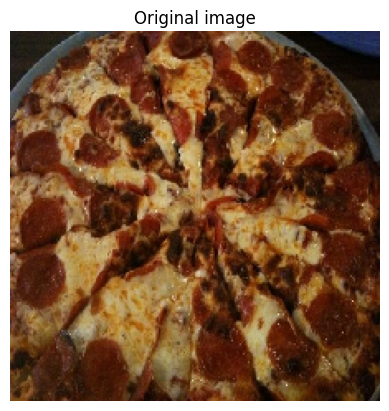

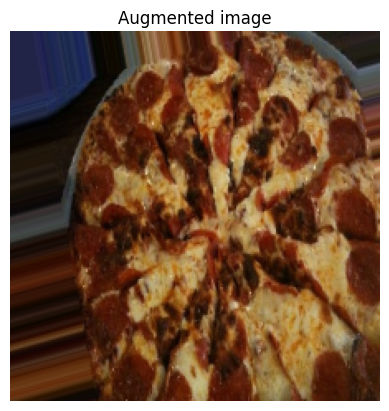

In [37]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


In [40]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [41]:
model_6 = Sequential([
    Conv2D(10,3,activation ='relu',input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# compile the model
model_6.compile(loss ='binary_crossentropy',
                optimizer=Adam(),
                metrics =['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                      epochs =5,
                      steps_per_epoch = len(train_data_augmented),
                      validation_data = test_data,
                      validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 484ms/step - loss: 0.7126 - accuracy: 0.5467 - val_loss: 0.6849 - val_accuracy: 0.5600
Epoch 2/5
47/47 [==============================] - 21s 441ms/step - loss: 0.6910 - accuracy: 0.5320 - val_loss: 0.6717 - val_accuracy: 0.6280
Epoch 3/5
47/47 [==============================] - 21s 444ms/step - loss: 0.6786 - accuracy: 0.5967 - val_loss: 0.6424 - val_accuracy: 0.6420
Epoch 4/5
47/47 [==============================] - 21s 445ms/step - loss: 0.6639 - accuracy: 0.5987 - val_loss: 0.6005 - val_accuracy: 0.7000
Epoch 5/5
47/47 [==============================] - 21s 441ms/step - loss: 0.6419 - accuracy: 0.6460 - val_loss: 0.5850 - val_accuracy: 0.6940


In [42]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [43]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 35s 620ms/step - loss: 0.6637 - accuracy: 0.5860 - val_loss: 0.5256 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 23s 479ms/step - loss: 0.5485 - accuracy: 0.7293 - val_loss: 0.4759 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 23s 499ms/step - loss: 0.5164 - accuracy: 0.7413 - val_loss: 0.4114 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 21s 458ms/step - loss: 0.4735 - accuracy: 0.7820 - val_loss: 0.3491 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 22s 471ms/step - loss: 0.4527 - accuracy: 0.7913 - val_loss: 0.3519 - val_accuracy: 0.8320


In [44]:
!nvidia-smi

Mon Feb 19 17:02:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0              29W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [46]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 547ms/step - loss: 0.6480 - accuracy: 0.6067 - val_loss: 0.5357 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5616 - accuracy: 0.7140 - val_loss: 0.4053 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 28s 589ms/step - loss: 0.5215 - accuracy: 0.7340 - val_loss: 0.4135 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 21s 444ms/step - loss: 0.4869 - accuracy: 0.7653 - val_loss: 0.3434 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 23s 500ms/step - loss: 0.4779 - accuracy: 0.7753 - val_loss: 0.3574 - val_accuracy: 0.8420


In [47]:
model_6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [48]:
print(class_names)

['pizza' 'steak']


--2024-02-19 17:05:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2024-02-19 17:05:33 (184 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



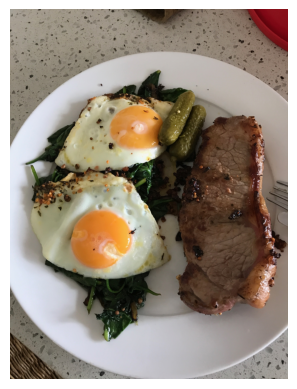

In [49]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [52]:
steak.shape

(4032, 3024, 3)

In [54]:
def load_and_prep_image(filename,img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img,channels=3)
  img = tf.image.resize(img,size = [img_shape,img_shape])
  img = img/255.
  return img


In [55]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [60]:
print({steak.shape})
print("We need to expannd a dimensions as per the image input for the model prediction")
steak = tf.expand_dims(steak,axis =0)
print({steak.shape})

{TensorShape([224, 224, 3])}
We need to expannd a dimensions as per the image input for the model prediction
{TensorShape([1, 224, 224, 3])}


In [61]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 381ms/step


array([[0.7280073]], dtype=float32)

In [62]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [63]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [64]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step


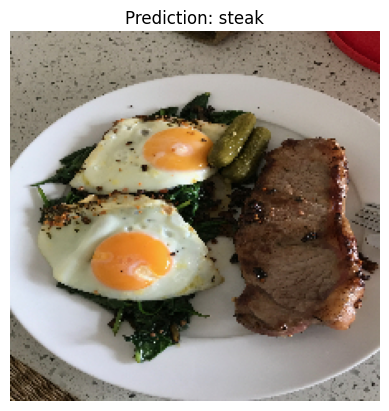

In [65]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2024-02-19 17:15:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2024-02-19 17:15:03 (119 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 83ms/step


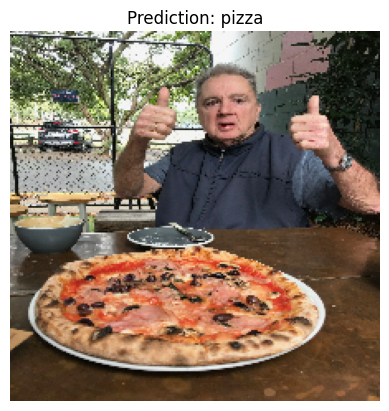

In [66]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

In [68]:
pizza_steak_prediction = model_8
pizza_steak_prediction.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [71]:
pizza_steak_prediction.save('pizza_steak_prediction.keras')